# MileStones: Final Project

**Name:** Gabriel George

**Date:** 12/16/24

**Excercise:** Final Project

**Netflix Titles Data:** Initial Exploratory Analysis, Data Cleaning, Plots, Dataset cleaning. In my code I used chatGPT to help me create the plots. 


In [ ]:
# Importing necessary libraries
import pandas as pd

file_path = "netflix_titles.csv" 
df = pd.read_csv(file_path)

# Showing basic statistics
print("Basic Statistics:")
print(df.describe(include="all"))

# Showing the names of the columns
print("\nColumn Names:")
print(df.columns)

print("\nShape of Dataset (Rows, Columns):")
print(df.shape)

print("\nData Types of Columns:")
print(df.dtypes)

# View the first 5 rows
print("\nFirst 5 Rows:")
print(df.head())

# Viewing the last 5 rows
print("\nLast 5 Rows:")
print(df.tail())

print("\nRandom Sample of Rows:")
print(df.sample(5))

print("\nDataset Information:")
print(df.info())


Basic Statistics:
       show_id   type   title       director                cast  \
count     8807   8807    8807           6173                7982   
unique    8807      2    8804           4528                7692   
top         s1  Movie  15-Aug  Rajiv Chilaka  David Attenborough   
freq         1   6131       2             19                  19   
mean       NaN    NaN     NaN            NaN                 NaN   
std        NaN    NaN     NaN            NaN                 NaN   
min        NaN    NaN     NaN            NaN                 NaN   
25%        NaN    NaN     NaN            NaN                 NaN   
50%        NaN    NaN     NaN            NaN                 NaN   
75%        NaN    NaN     NaN            NaN                 NaN   
max        NaN    NaN     NaN            NaN                 NaN   

              country date_added  release_year rating  duration  \
count            7976       8797   8807.000000   8803      8804   
unique            748       176


**Purpose:**  This code performs basic exploration of the Netflix Titles dataset by first loading the data from a CSV file into a Pandas DataFrame. It provides an overview of the dataset by displaying basic statistics, such as count, mean, and unique values for all columns, along with listing the column names. The shape of the dataset, including the number of rows and columns, is shown to give an understanding of its size. The code also identifies the data types of each column to help understand the structure of the data. Additionally, it previews the dataset by displaying the first and last five rows, as well as a random sample of rows. Finally, it provides a comprehensive summary of the dataset’s information, such as non-null values and memory usage, which helps assess its completeness and readiness for further analysis.  








In [ ]:
# Importing necessary libraries
import pandas as pd

file_path = "netflix_titles.csv" 
df = pd.read_csv(file_path)

# Showing basic statistics
print("Basic Statistics:")
print(df.describe(include="all"))

# Showing the names of the columns
print("\nColumn Names:")
print(df.columns)

print("\nShape of Dataset (Rows, Columns):")
print(df.shape)

print("\nData Types of Columns:")
print(df.dtypes)

# View the first 5 rows
print("\nFirst 5 Rows:")
print(df.head())

# Viewing the last 5 rows
print("\nLast 5 Rows:")
print(df.tail())

print("\nRandom Sample of Rows:")
print(df.sample(5))

print("\nDataset Information:")
print(df.info())



# 1. Checking for Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values per Column (Count and Percentage):")
print(pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage}))

# 2. Handling Missing Values
df['rating'] = df['rating'].fillna('Not Rated') if 'rating' in df.columns else df['rating']

# Replacing the  missing `country` with 'Unknown'
df['country'] = df['country'].fillna('Unknown') if 'country' in df.columns else df['country']

# Replacing the  missing `date_added` with 'Unknown'
df['date_added'] = df['date_added'].fillna('Unknown') if 'date_added' in df.columns else df['date_added']

# Dropping the rows with more than 50% missing values
df = df.dropna(thresh=len(df.columns) // 2)

# Verifing missing values after cleaning
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


# Checking for duplicate rows
duplicates = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)

# Removing duplicate rows
df = df.drop_duplicates()

if 'date_added' in df.columns:
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Spliting duration into different components
if 'duration' in df.columns:
    df[['duration_value', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s*(\w+)', expand=True)
    df['duration_value'] = pd.to_numeric(df['duration_value'], errors='coerce')
    df = df.drop(columns=['duration'])


df.columns = df.columns.str.lower().str.replace(" ", "_")

# 6. Verify the Cleaned Dataset
print("\nCleaned Dataset Info:")
df.info()

print("\nSample of Cleaned Dataset:")
print(df.sample(5))

# Save the cleaned data to a new CSV file
output_file_path = "netflix_titles_cleaned.csv"
df.to_csv(output_file_path, index=False)
print(f"\nCleaned data saved to {output_file_path}")


Basic Statistics:
       show_id   type   title       director                cast  \
count     8807   8807    8807           6173                7982   
unique    8807      2    8804           4528                7692   
top         s1  Movie  15-Aug  Rajiv Chilaka  David Attenborough   
freq         1   6131       2             19                  19   
mean       NaN    NaN     NaN            NaN                 NaN   
std        NaN    NaN     NaN            NaN                 NaN   
min        NaN    NaN     NaN            NaN                 NaN   
25%        NaN    NaN     NaN            NaN                 NaN   
50%        NaN    NaN     NaN            NaN                 NaN   
75%        NaN    NaN     NaN            NaN                 NaN   
max        NaN    NaN     NaN            NaN                 NaN   

              country date_added  release_year rating  duration  \
count            7976       8797   8807.000000   8803      8804   
unique            748       176

/var/folders/fh/68ttccfj0yq3n_9rbf90j2wm0000gn/T/ipykernel_89076/2832233240.py:68: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


**Purpose:** This code performs a comprehensive analysis and cleaning of a Netflix dataset. It begins by importing the dataset and displaying various exploratory details, such as basic statistics, column names, dataset shape, data types, and a sample of rows. It identifies and handles missing values by filling them with appropriate defaults (e.g., replacing missing ratings with "Not Rated" and missing countries with "Unknown") and dropping rows with excessive missing data. Duplicate rows are identified and removed, and the date_added column is converted to a proper datetime format. The duration column, if present, is split into numeric (duration_value) and categorical (duration_type) components. All column names are standardized to lowercase and underscore-separated. Finally, the cleaned dataset is saved to a new CSV file, providing a processed and consistent dataset for further analysis or modeling.








<Figure size 1200x600 with 0 Axes>

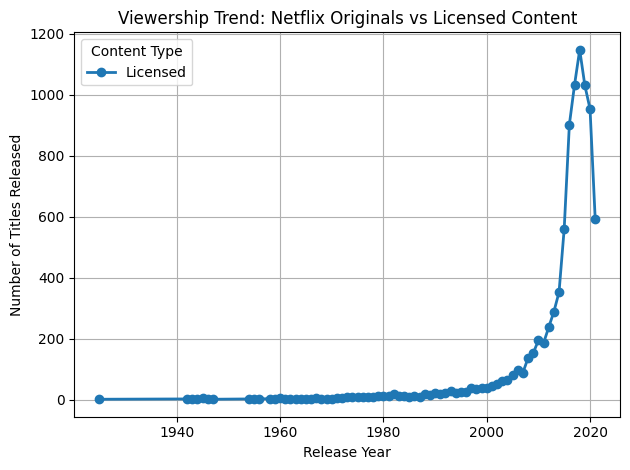

In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# loading the dataset
file_path = "netflix_titles.csv"  
df = pd.read_csv(file_path)

# Handling missing values
df.fillna({'rating': 'Unknown', 'type': 'Unknown', 'listed_in': 'Unknown'}, inplace=True)

# Creating a column to classify content as "Netflix Original" or "Licensed"
df['is_netflix_original'] = df['type'].apply(lambda x: 'Original' if 'Netflix' in x else 'Licensed')

# Filtering out the invalid years
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Droping rows with invalid or missing 'release_year'
df.dropna(subset=['release_year'], inplace=True)

# Grouping by release year and content type (Netflix Originals vs Licensed)
viewership_trend = df.groupby(['release_year', 'is_netflix_original']).size().unstack(fill_value=0)

# Plotting the graph
plt.figure(figsize=(12, 6))
viewership_trend.plot(kind='line', marker='o', color=['#1f77b4', '#ff7f0e'], linewidth=2)
plt.title("Viewership Trend: Netflix Originals vs Licensed Content")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles Released")
plt.legend(title="Content Type")
plt.grid(True)
plt.tight_layout()
plt.show()


**Purpose:** This code analyzes and visualizes the release trends of Netflix Originals and licensed content over the years. It begins by importing the Netflix dataset and handling missing values, filling specific columns like rating, type, and listed_in with "Unknown" where necessary. A new column, is_netflix_original, is created to classify content as either "Original" or "Licensed." The release_year column is cleaned by converting it to a numeric format and removing rows with invalid or missing values. The data is then grouped by release year and content type, calculating the number of titles released each year for Netflix Originals and licensed content. Finally, the code generates a line graph to depict the viewership trend over time, with clear labels, markers, and a legend to distinguish between the two content types, providing a visual representation of how Netflix's content strategy has evolved.








<Figure size 1000x600 with 0 Axes>

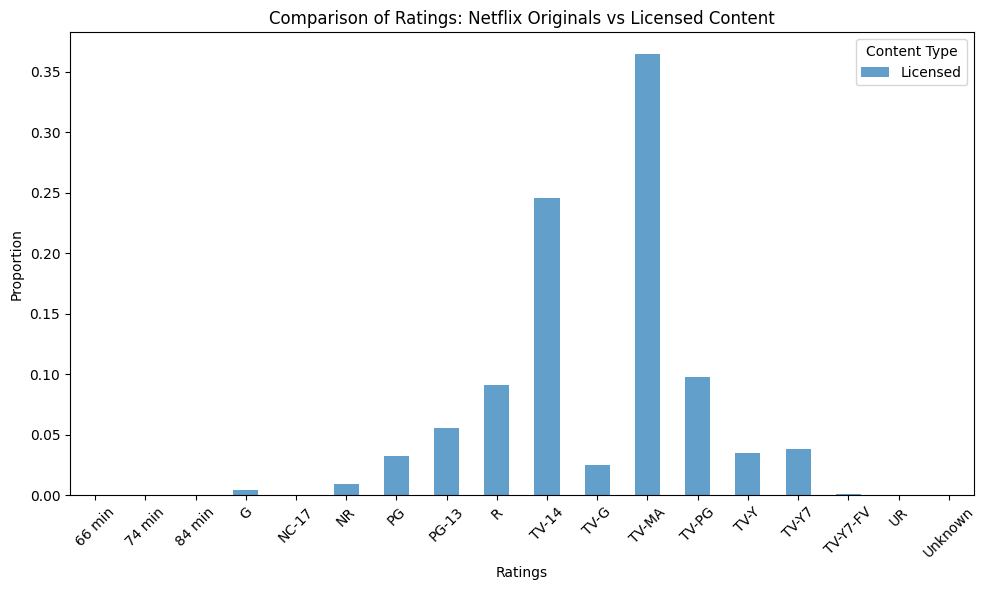

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
file_path = "netflix_titles.csv"
df = pd.read_csv(file_path)

# Handling missing values (optional: you can customize this part based on your dataset)
df.fillna({'rating': 'Unknown', 'type': 'Unknown', 'listed_in': 'Unknown'}, inplace=True)

# Creating a column to classify content as "Netflix Original" or "Licensed"
df['is_netflix_original'] = df['type'].apply(lambda x: 'Original' if 'Netflix' in x else 'Licensed')

rating_counts = df['rating'].groupby(df['is_netflix_original']).value_counts(normalize=True).unstack()

# Plotting the graph
plt.figure(figsize=(10, 6))
rating_counts.T.plot(kind='bar', figsize=(10, 6), alpha=0.7)
plt.title("Comparison of Ratings: Netflix Originals vs Licensed Content")
plt.ylabel("Proportion")
plt.xlabel("Ratings")
plt.legend(title="Content Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Purpose:** This code analyzes and visualizes the distribution of ratings between Netflix Originals and licensed content. It starts by importing the dataset and addressing missing values, replacing empty entries in columns like rating, type, and listed_in with "Unknown." A new column, is_netflix_original, is added to classify content as either "Original" or "Licensed" based on the type column. The code then calculates the proportion of titles for each rating category, grouped by whether the content is a Netflix Original or licensed. This data is used to create a bar chart that compares the rating distributions for the two content types. The graph is styled with labeled axes, a title, and a legend for clarity, providing a visual understanding of how Netflix Originals and licensed content differ in their ratings.


/var/folders/fh/68ttccfj0yq3n_9rbf90j2wm0000gn/T/ipykernel_89076/155679796.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres.values, y=genres.index, palette='viridis')


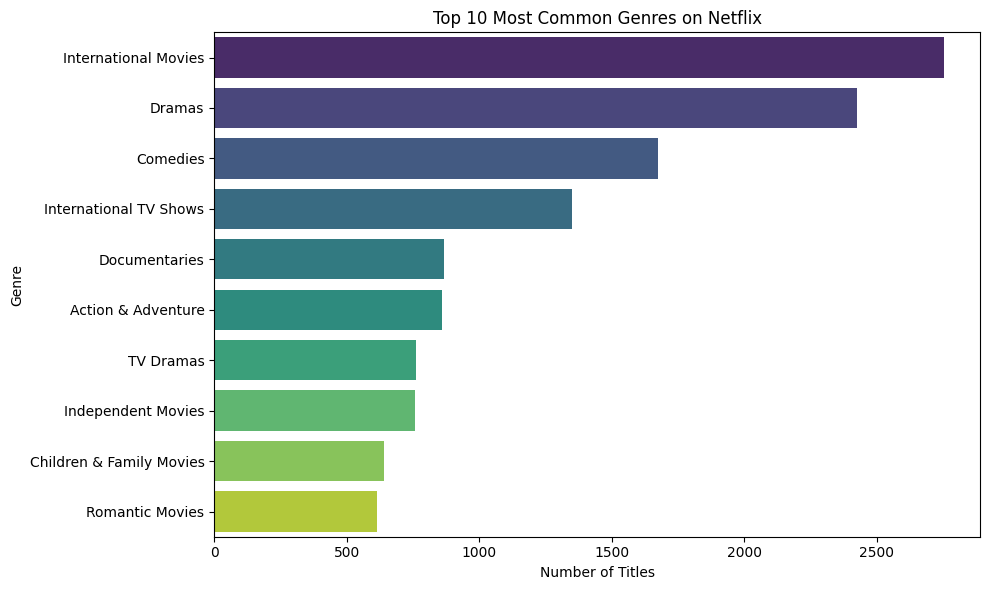

In [ ]:
genres = df['listed_in'].str.split(', ').explode().value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=genres.values, y=genres.index, palette='viridis')
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


**Purpose:** This code analyzes and visualizes the top 10 most common genres available on Netflix. It begins by splitting the listed_in column, which contains multiple genres for each title, into separate genres. The explode() function is used to transform the list of genres into individual entries, and then value_counts() counts the frequency of each genre. The top 10 most common genres are selected using head(10). A horizontal bar chart is created to display the frequency of these top genres, using the Seaborn library for styling and coloring with the 'viridis' palette. The graph is labeled with the number of titles on the x-axis and the genre names on the y-axis, providing a clear visual of the most popular genres on Netflix.


<Figure size 1000x600 with 0 Axes>

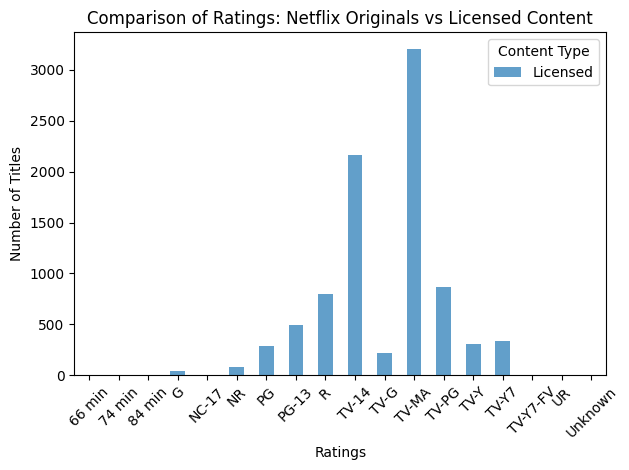

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
file_path = "netflix_titles.csv"
df = pd.read_csv(file_path)

# Handling missing values
df.fillna({'rating': 'Unknown', 'type': 'Unknown'}, inplace=True)

# Creating a column to classify content as "Netflix Original" or "Licensed"
df['is_netflix_original'] = df['type'].apply(lambda x: 'Original' if 'Netflix' in x else 'Licensed')

# Grouping by content type and rating
rating_counts = df.groupby(['is_netflix_original', 'rating']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
rating_counts.T.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], alpha=0.7)
plt.title("Comparison of Ratings: Netflix Originals vs Licensed Content")
plt.xlabel("Ratings")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.legend(title="Content Type")
plt.tight_layout()
plt.show()


**Purpose:** The purpose of the code above is to compare the distribution of ratings for Netflix Originals versus licensed content using a stacked bar chart. It categorizes the data by content type (Netflix Original or Licensed) and rating, then visualizes how the ratings are distributed across both categories. The chart helps to clearly understand how Netflix Originals and licensed content perform in terms of user ratings, providing insights into their relative success.








<function matplotlib.pyplot.show(close=None, block=None)>

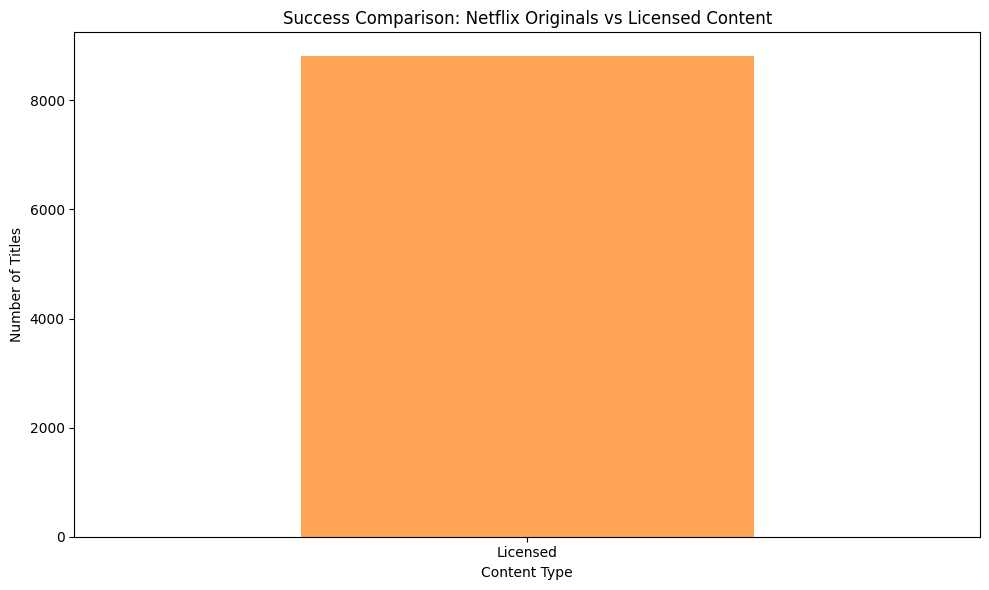

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
file_path = "netflix_titles.csv"
df = pd.read_csv(file_path)

# Handling missing values
df.fillna({'rating': 'Unknown', 'type': 'Unknown', 'listed_in': 'Unknown'}, inplace=True)

# Creating a column to classify content as "Netflix Original" or "Licensed"
df['is_netflix_original'] = df['type'].apply(lambda x: 'Original' if 'Netflix' in x else 'Licensed')

# Plotting success comparison between Netflix Originals and Licensed content
success_comparison = df['is_netflix_original'].value_counts()

plt.figure(figsize=(10, 6))
success_comparison.plot(kind='bar', color=['#ff7f0e', '#1f77b4'], alpha=0.7)
plt.title("Success Comparison: Netflix Originals vs Licensed Content")
plt.xlabel("Content Type")
plt.ylabel("Number of Titles")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show

**Purpose:** This code loads a Netflix dataset, handles missing values by filling in 'Unknown' for certain columns, and classifies content into "Netflix Originals" and "Licensed." It then compares the number of Netflix Originals versus Licensed content by creating a new column, is_netflix_original, based on the 'type' of content. A bar chart is generated to visually represent this comparison, with the number of titles in each category plotted. The plot highlights the success comparison between Netflix Originals and Licensed content, with customization for aesthetics such as color and layout.






